In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [2]:
data= pd.read_csv("pima_diabetes_smote.csv")

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.shape

(620, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
SkinThickness               0
BMI                         0
BloodPressure               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.dtypes

Pregnancies                 float64
Glucose                     float64
SkinThickness               float64
BMI                         float64
BloodPressure               float64
Insulin                     float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [7]:
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].interpolate(method='linear')

print(data)

     Pregnancies     Glucose  SkinThickness        BMI  BloodPressure  \
0       2.000000   95.000000      54.000000  14.000000      88.000000   
1       2.000000   93.000000      64.000000  32.000000     160.000000   
2       5.000000  128.000000      80.000000   0.000000     157.000000   
3       4.000000  122.000000      68.000000   0.000000     154.000000   
4       2.000000   92.000000      62.000000  28.000000     151.000000   
..           ...         ...            ...        ...            ...   
615     6.514001  123.200995      76.971997  30.485999     119.791728   
616     7.622408  152.867225      76.867225  32.566387     165.344265   
617     8.000000  141.852613      77.282558  33.434884     210.896803   
618     6.870302  154.259397      84.000000  43.618422     220.099629   
619     6.359146  123.281707      74.514024   0.000000     220.099629   

       Insulin  DiabetesPedigreeFunction        Age  Outcome  
0    26.100000                  0.748000  22.000000        0

In [8]:
data['BMI'] = data['BMI'].replace(0, np.nan)
data['BMI'] = data['BMI'].interpolate(method='linear')
print(data)

     Pregnancies     Glucose  SkinThickness        BMI  BloodPressure  \
0       2.000000   95.000000      54.000000  14.000000      88.000000   
1       2.000000   93.000000      64.000000  32.000000     160.000000   
2       5.000000  128.000000      80.000000  30.666667     157.000000   
3       4.000000  122.000000      68.000000  29.333333     154.000000   
4       2.000000   92.000000      62.000000  28.000000     151.000000   
..           ...         ...            ...        ...            ...   
615     6.514001  123.200995      76.971997  30.485999     119.791728   
616     7.622408  152.867225      76.867225  32.566387     165.344265   
617     8.000000  141.852613      77.282558  33.434884     210.896803   
618     6.870302  154.259397      84.000000  43.618422     220.099629   
619     6.359146  123.281707      74.514024  43.618422     220.099629   

       Insulin  DiabetesPedigreeFunction        Age  Outcome  
0    26.100000                  0.748000  22.000000        0

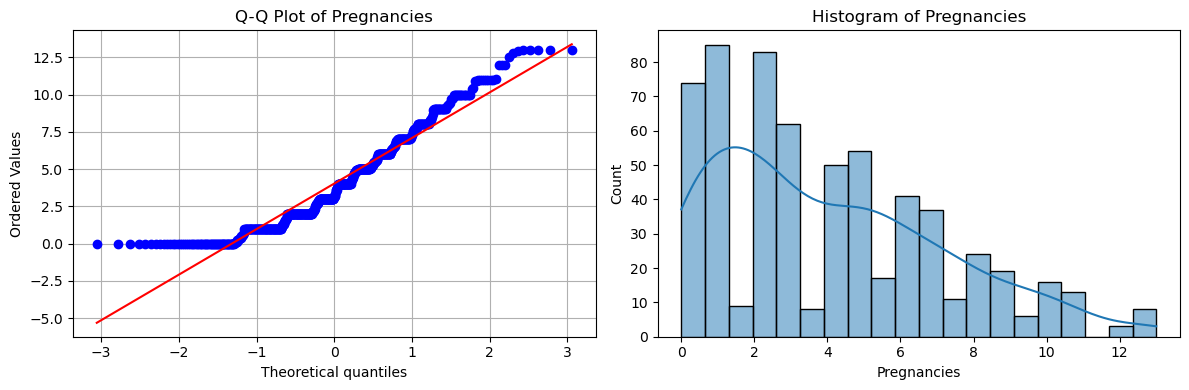

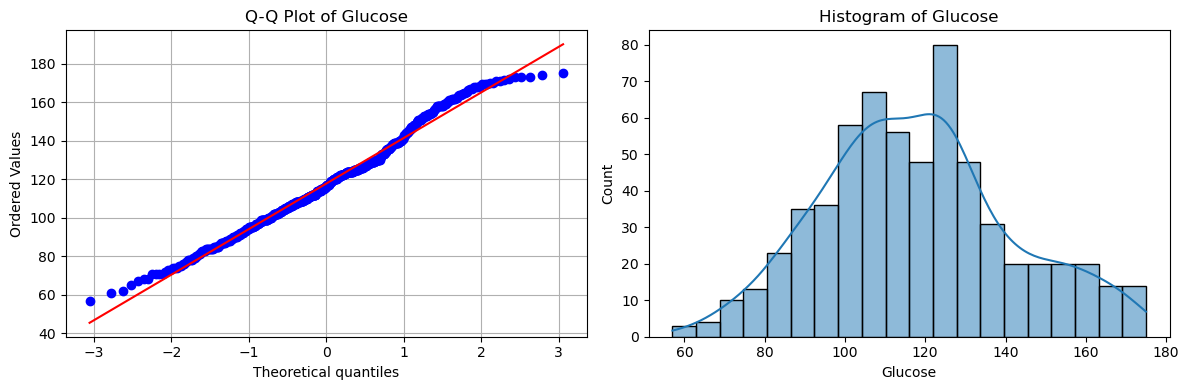

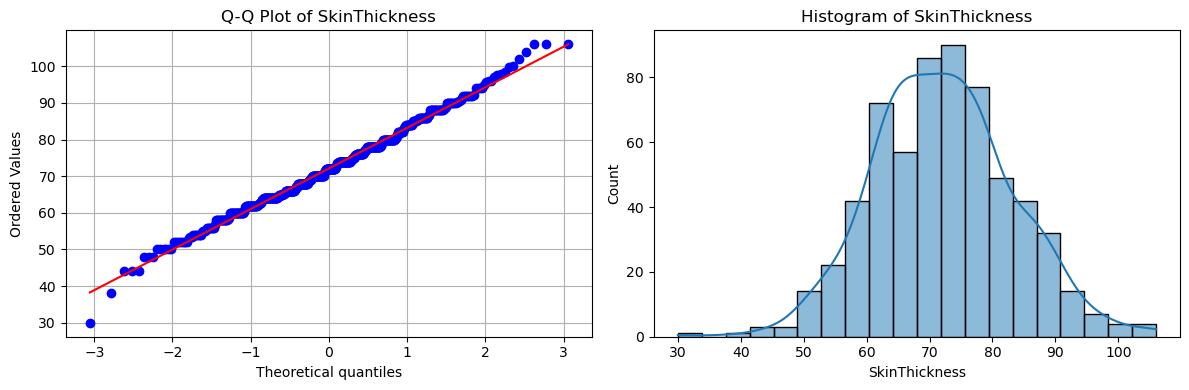

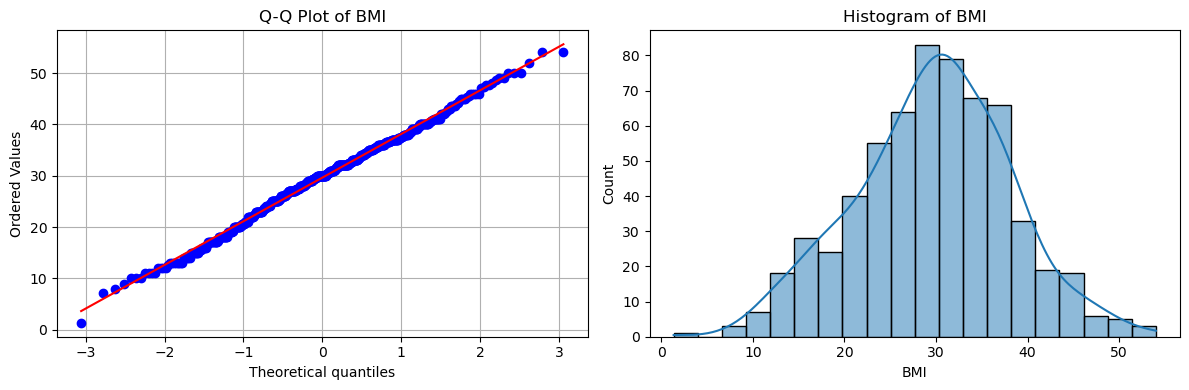

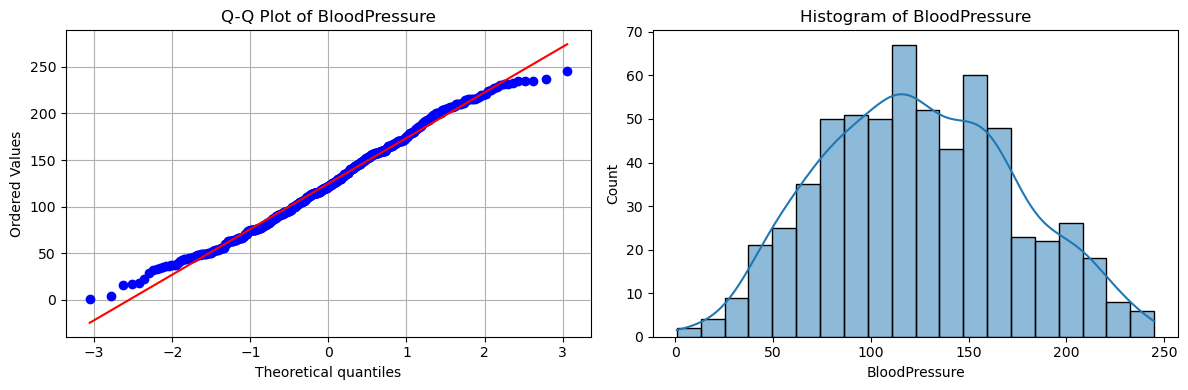

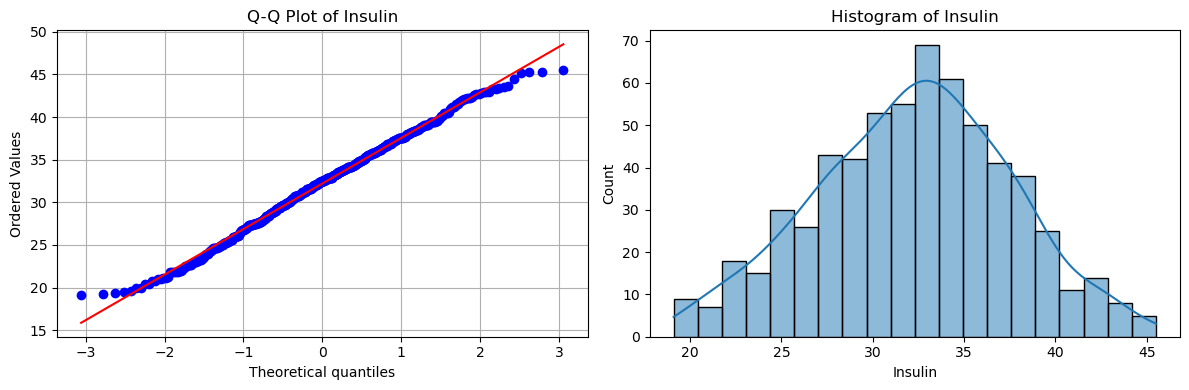

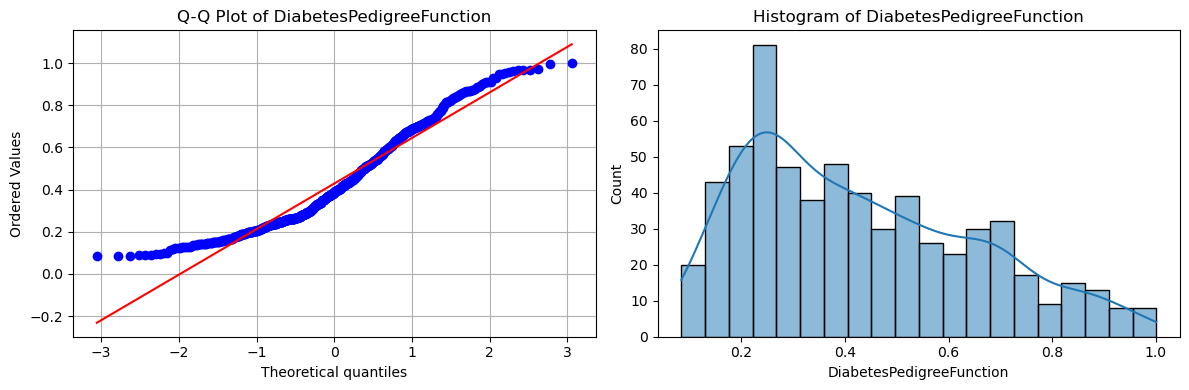

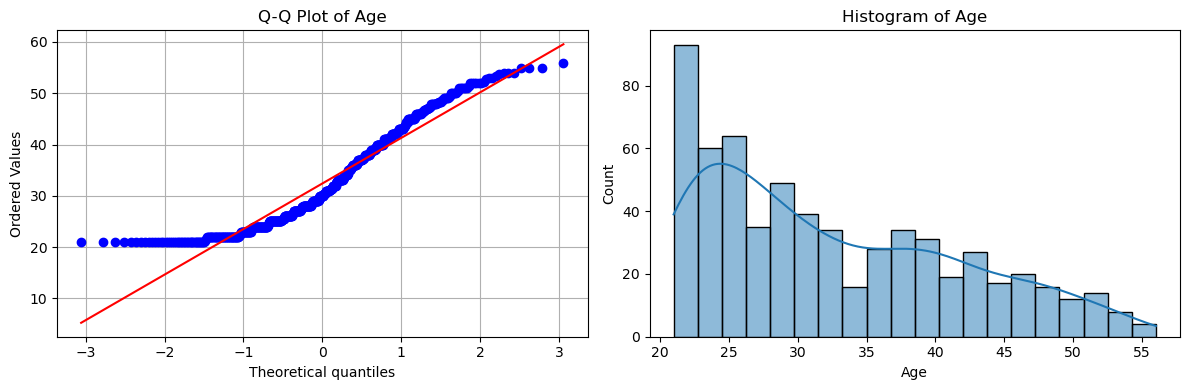

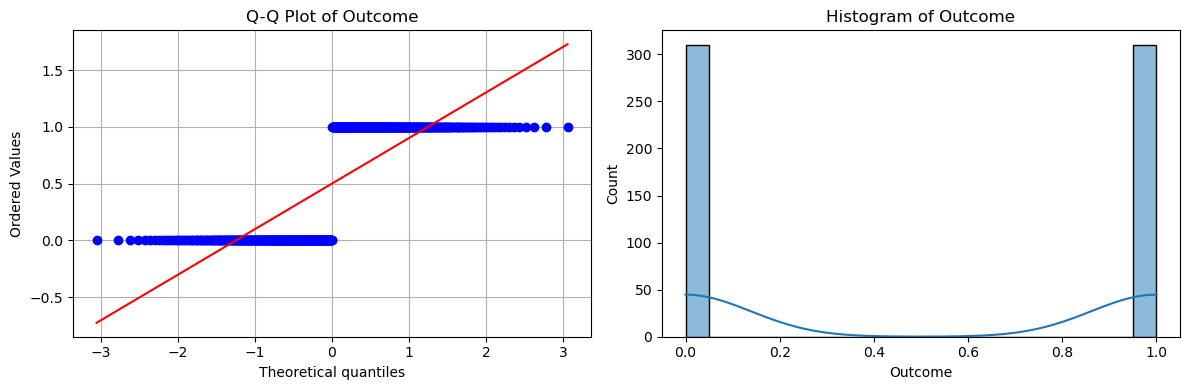

In [9]:
num_cols = [col for col in data.select_dtypes(include=['int64', 'float64'])]

for column in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  
    
    stats.probplot(data[column], dist="norm", plot=axes[0])
    axes[0].set_title(f'Q-Q Plot of {column}')
    axes[0].grid(True)

    sns.histplot(data[column], bins=20, kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

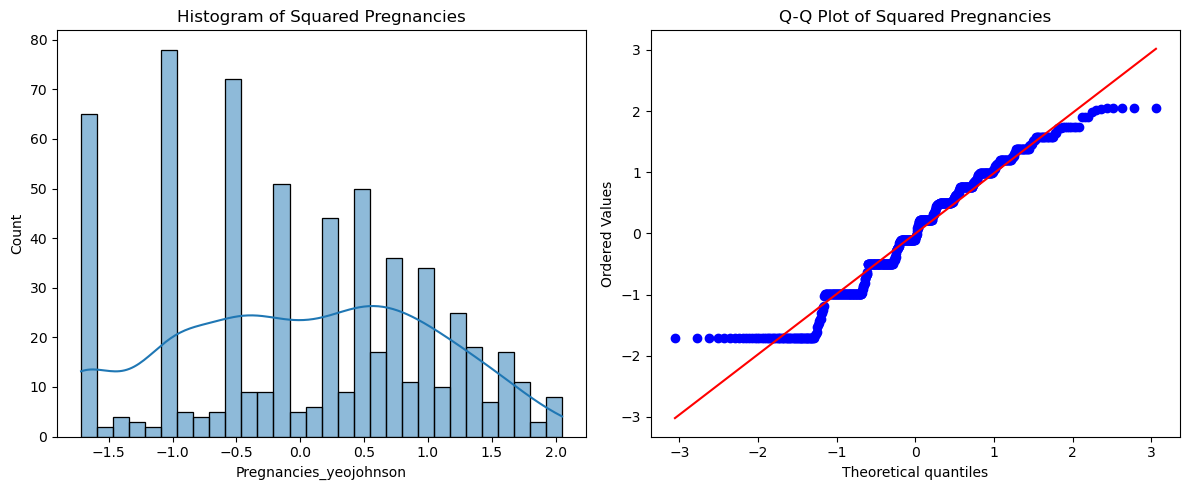

In [10]:
pt = PowerTransformer(method='yeo-johnson')  
data['Pregnancies_yeojohnson'] = pt.fit_transform(data[['Pregnancies']])
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Pregnancies_yeojohnson'], kde=True, bins=30)
plt.title('Histogram of Squared Pregnancies')

plt.subplot(1, 2, 2)
stats.probplot(data['Pregnancies_yeojohnson'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Squared Pregnancies')

plt.tight_layout()
plt.show()

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_yeojohnson'],
      dtype='object')

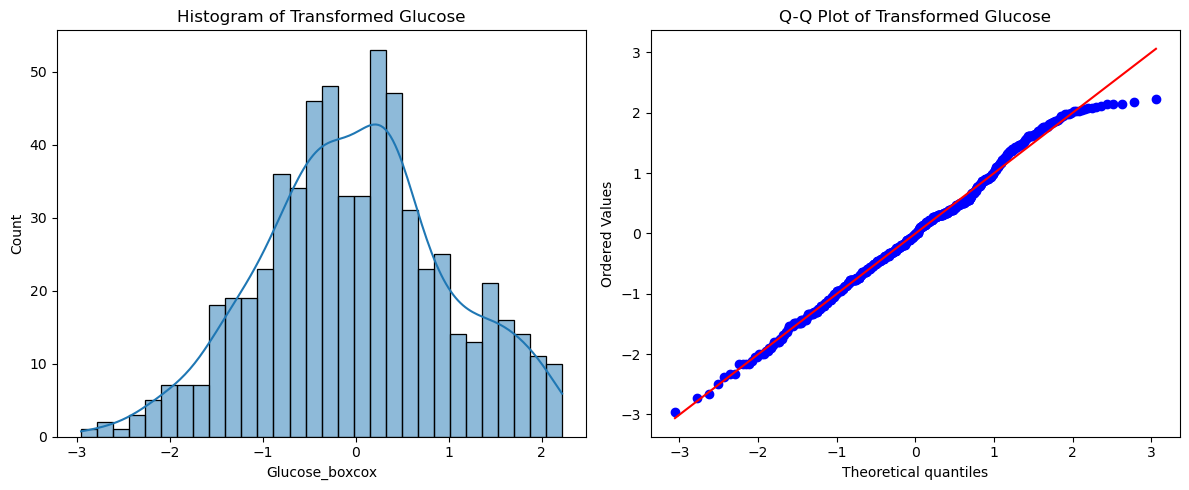

In [12]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['Glucose_boxcox'] = boxcox_transformer.fit_transform(data[['Glucose']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Glucose_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed Glucose')

plt.subplot(1, 2, 2)
stats.probplot(data['Glucose_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Glucose')

plt.tight_layout()
plt.show()

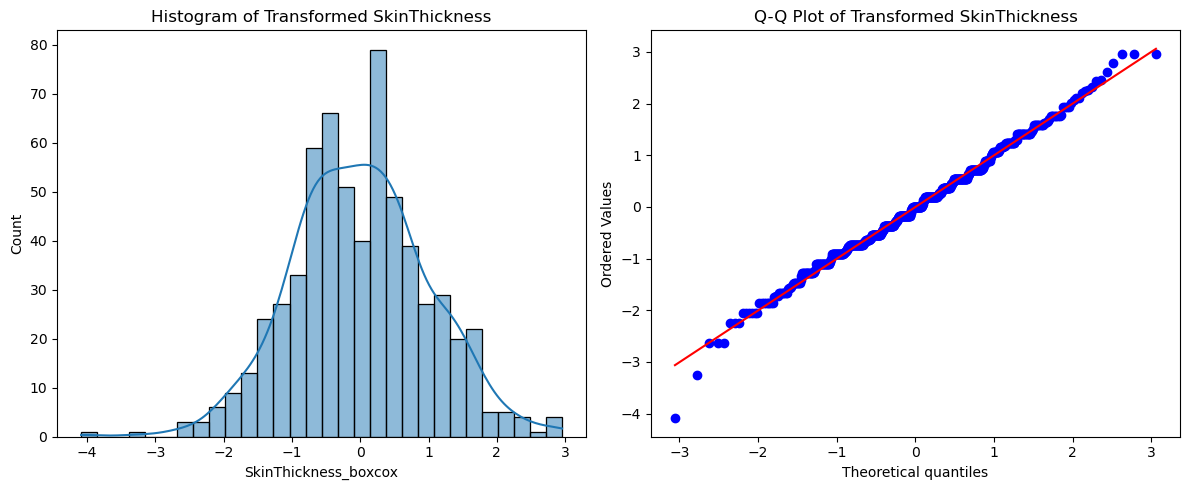

In [13]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['SkinThickness_boxcox'] = boxcox_transformer.fit_transform(data[['SkinThickness']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['SkinThickness_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed SkinThickness')

plt.subplot(1, 2, 2)
stats.probplot(data['SkinThickness_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed SkinThickness')

plt.tight_layout()
plt.show()


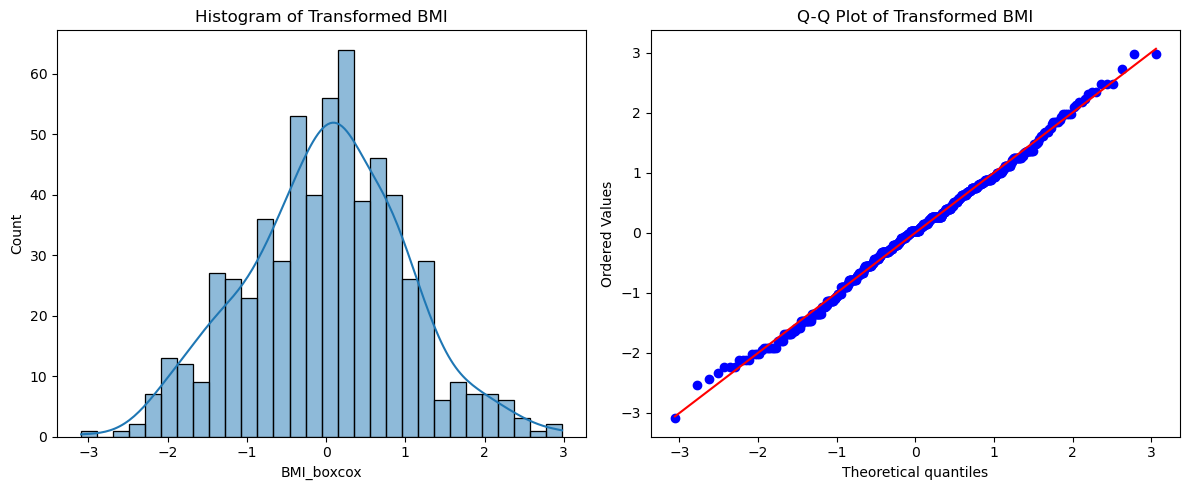

In [14]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['BMI_boxcox'] = boxcox_transformer.fit_transform(data[['BMI']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BMI_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed BMI')

plt.subplot(1, 2, 2)
stats.probplot(data['BMI_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed BMI')

plt.tight_layout()
plt.show()

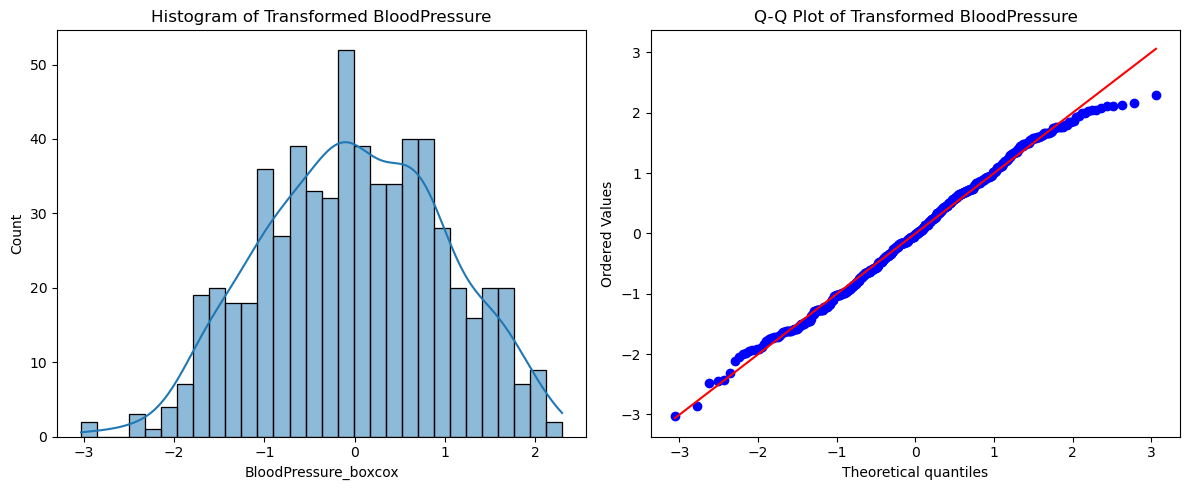

In [15]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['BloodPressure_boxcox'] = boxcox_transformer.fit_transform(data[['BloodPressure']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BloodPressure_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed BloodPressure')

plt.subplot(1, 2, 2)
stats.probplot(data['BloodPressure_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed BloodPressure')

plt.tight_layout()
plt.show()

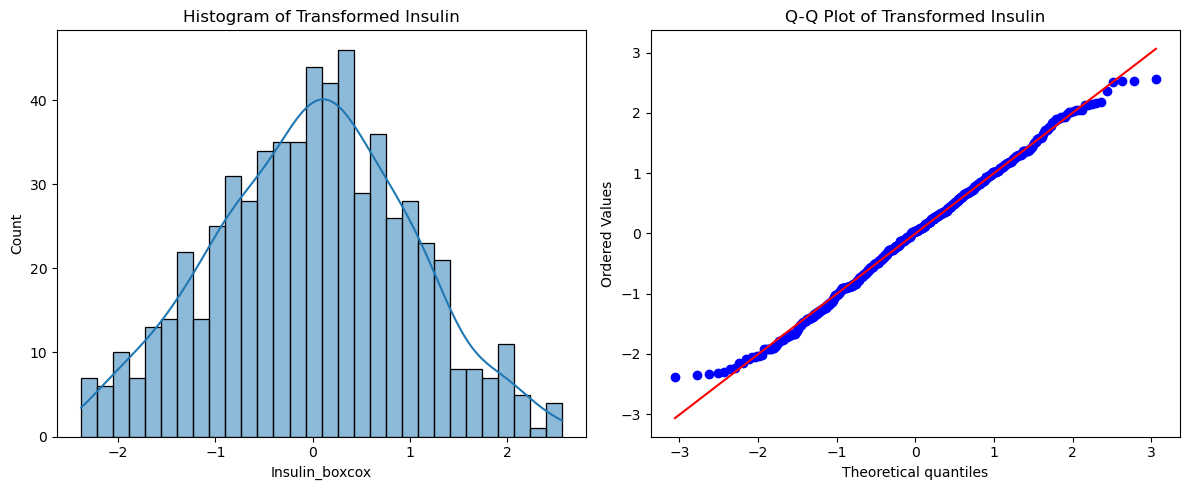

In [16]:
boxcox_transformer = PowerTransformer(method='box-cox')
data['Insulin_boxcox'] = boxcox_transformer.fit_transform(data[['Insulin']])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Insulin_boxcox'], kde=True, bins=30)
plt.title('Histogram of Transformed Insulin')

plt.subplot(1, 2, 2)
stats.probplot(data['Insulin_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Insulin')

plt.tight_layout()
plt.show()

In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_yeojohnson', 'Glucose_boxcox', 'SkinThickness_boxcox',
       'BMI_boxcox', 'BloodPressure_boxcox', 'Insulin_boxcox'],
      dtype='object')

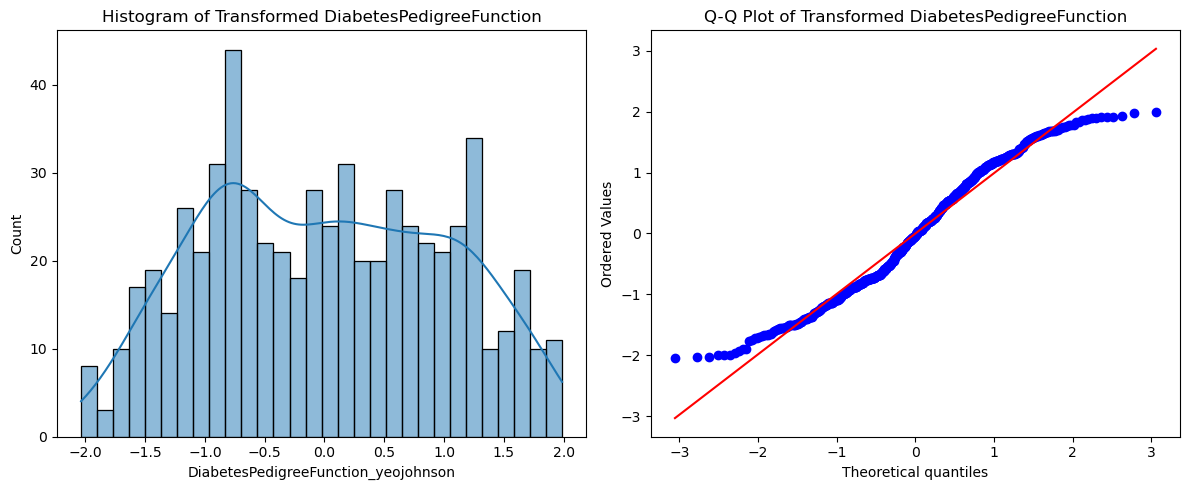

In [18]:
pt = PowerTransformer(method='yeo-johnson')  
data['DiabetesPedigreeFunction_yeojohnson'] = pt.fit_transform(data[['DiabetesPedigreeFunction']])
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data['DiabetesPedigreeFunction_yeojohnson'], kde=True, bins=30)
plt.title('Histogram of Transformed DiabetesPedigreeFunction')

plt.subplot(1, 2, 2)
stats.probplot(data['DiabetesPedigreeFunction_yeojohnson'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed DiabetesPedigreeFunction')

plt.tight_layout()
plt.show()

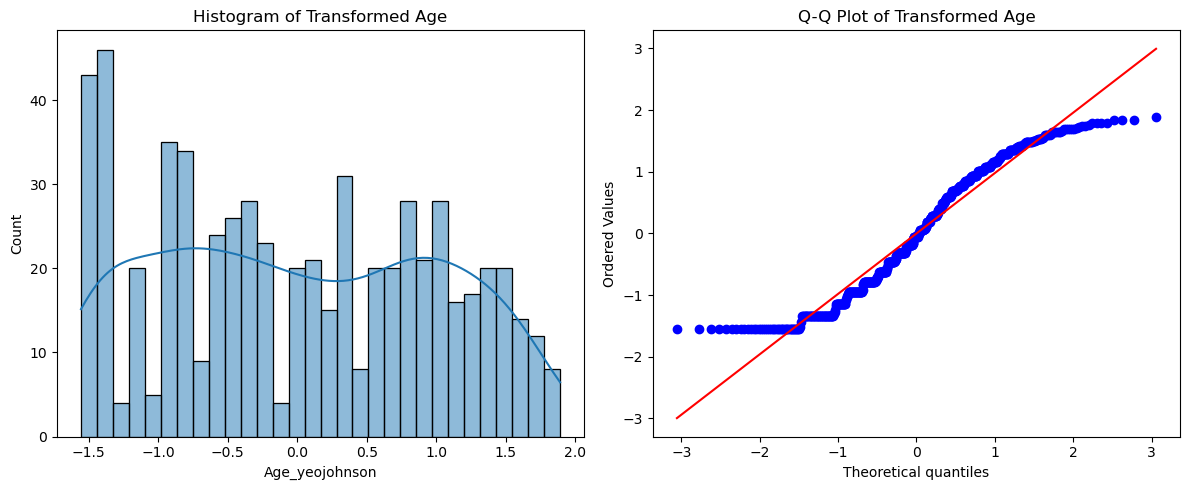

In [19]:
pt = PowerTransformer(method='yeo-johnson')  
data['Age_yeojohnson'] = pt.fit_transform(data[['Age']])
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data['Age_yeojohnson'], kde=True, bins=30)
plt.title('Histogram of Transformed Age')

plt.subplot(1, 2, 2)
stats.probplot(data['Age_yeojohnson'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Transformed Age')

plt.tight_layout()
plt.show()

In [20]:
data.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_yeojohnson', 'Glucose_boxcox', 'SkinThickness_boxcox',
       'BMI_boxcox', 'BloodPressure_boxcox', 'Insulin_boxcox',
       'DiabetesPedigreeFunction_yeojohnson', 'Age_yeojohnson'],
      dtype='object')

In [21]:
data.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_yeojohnson,Glucose_boxcox,SkinThickness_boxcox,BMI_boxcox,BloodPressure_boxcox,Insulin_boxcox,DiabetesPedigreeFunction_yeojohnson,Age_yeojohnson
0,2.0,95.0,54.0,14.000000,88.0,26.1,0.748,22.0,0,-0.500351,-0.960865,-1.666510,-1.806548,-0.726938,-1.144192,1.355649,-1.341780
1,2.0,93.0,64.0,32.000000,160.0,38.0,0.674,23.0,1,-0.500351,-1.054810,-0.726663,0.268194,0.734038,1.091137,1.128668,-1.142875
2,5.0,128.0,80.0,30.666667,157.0,34.6,0.144,45.0,0,0.502693,0.468689,0.719346,0.109095,0.676167,0.438070,-1.538554,1.291728
3,4.0,122.0,68.0,29.333333,154.0,35.0,0.394,29.0,0,0.218216,0.223562,-0.359055,-0.049287,0.618082,0.514347,0.011531,-0.187160
4,2.0,92.0,62.0,28.000000,151.0,31.6,0.130,24.0,0,-0.500351,-1.102153,-0.912160,-0.206921,0.559779,-0.129049,-1.649111,-0.957297
5,0.0,109.0,88.0,30.000000,148.0,32.5,0.855,38.0,1,-1.717114,-0.328686,1.420370,0.029812,0.501253,0.040149,1.647087,0.769685
6,5.0,130.0,82.0,35.500000,145.0,39.1,0.956,37.0,1,0.502693,0.549142,0.895852,0.689053,0.442498,1.304641,1.888605,0.682207
7,0.0,105.0,64.0,41.000000,142.0,41.5,0.173,22.0,0,-1.717114,-0.505030,-0.726663,1.359039,0.383508,1.774048,-1.319228,-1.341780
8,2.0,112.0,75.0,32.000000,116.0,35.7,0.148,21.0,0,-0.500351,-0.198499,0.274196,0.268194,-0.138534,0.648194,-1.507538,-1.555614
9,2.0,101.0,58.0,35.000000,90.0,21.8,0.155,22.0,0,-0.500351,-0.684697,-1.286762,0.628655,-0.683822,-1.912741,-1.453860,-1.341780


In [22]:
data.to_csv("pima_diabetes_featured.csv", index=False)

print("SMOTE-applied dataset saved as 'pima_diabetes_featured.csv'")

SMOTE-applied dataset saved as 'pima_diabetes_featured.csv'
